In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('hurriyet.txt', 'r', encoding='utf8')
text = f.read()
t_list = text.split('\n')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [5]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)

In [6]:
model.wv['ankara']

array([-0.01470333, -0.310944  , -0.283225  ,  0.3480909 ,  0.47285187,
       -0.10549687, -0.29474992,  0.8242648 , -0.03320593, -0.21144126,
        0.05913171, -0.23790519, -0.13164699,  0.4046979 , -0.2960554 ,
        0.5769303 ,  0.26242992, -0.46418184,  0.35401782, -0.5405251 ,
       -0.1103542 ,  0.23497085,  0.64643073, -0.51069605, -0.12201267,
       -0.09426329, -0.41967875, -0.07814217, -0.20313981,  0.5154871 ,
        0.4173147 ,  0.0952393 , -0.0038348 , -0.568239  ,  0.38190368,
       -0.2157406 , -0.34079963, -0.02608101,  0.02876059, -0.55937487,
        0.573707  , -0.17820628,  0.44914773, -0.33485192,  0.44147602,
        0.15389839, -0.41604117, -0.15267138, -0.05826371, -0.1174724 ,
        0.04493266, -0.30319038,  0.20708352, -0.19363321, -0.3356915 ,
       -0.34978878, -0.07439592,  0.23664406, -0.40099055, -0.64350873,
        0.05553368,  0.20745212,  0.0089555 ,  0.22735204, -0.21220525,
       -0.08930648,  0.21822813, -0.00888399, -0.33793128, -0.03

In [8]:
model.wv.most_similar('youtube')

[('twitter', 0.7625253796577454),
 ('facebook', 0.7367634177207947),
 ('whatsapp', 0.7298423647880554),
 ('paylaşım', 0.7282233834266663),
 ('internete', 0.7120782732963562),
 ('twıtter', 0.7083313465118408),
 ('video', 0.6883316040039062),
 ('sayfasına', 0.6852680444717407),
 ('etiketiyle', 0.6843671798706055),
 ('ınstagram', 0.6770439743995667)]

In [9]:
model.save('word2vec.model')

In [10]:
model = Word2Vec.load('word2vec.model')

In [11]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

C:\Users\Aleyna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Aleyna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


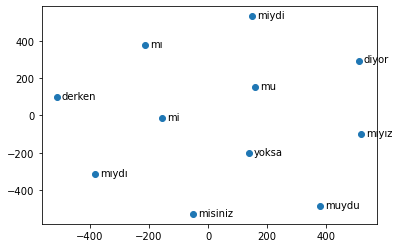

In [12]:
closestwords_tsneplot(model, 'mu')